In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
train = pd.read_csv('data/train_features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_features.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [3]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
y = tf.keras.utils.to_categorical(train_labels['label']) 

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Bidirectional
from keras import optimizers
from keras.callbacks import EarlyStopping

def bi_lstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(32, return_sequences = True),  input_shape = (600,6)))
    model.add(Bidirectional(LSTM(64, return_sequences = True)))
    model.add(Bidirectional(LSTM(128, return_sequences = False)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(61, activation='softmax'))
    
    #adam = optimizers.adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    return model

In [10]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [15]:
model = bi_lstm()
hist = model.fit(X,y, epochs=100, batch_size=32, verbose = 1,  validation_split=0.2, callbacks = [es])

Epoch 1/100
79/79 [==============================] - 149s 2s/step - loss: 3.0785 - accuracy: 0.4387 - val_loss: 2.6456 - val_accuracy: 0.4608
Epoch 2/100
79/79 [==============================] - 148s 2s/step - loss: 2.3755 - accuracy: 0.5020 - val_loss: 2.2539 - val_accuracy: 0.5408
Epoch 3/100
79/79 [==============================] - 196s 2s/step - loss: 2.1043 - accuracy: 0.5194 - val_loss: 2.0803 - val_accuracy: 0.5264
Epoch 4/100
79/79 [==============================] - 199s 3s/step - loss: 1.7154 - accuracy: 0.5591 - val_loss: 2.0461 - val_accuracy: 0.5488
Epoch 5/100
79/79 [==============================] - 194s 2s/step - loss: 1.5882 - accuracy: 0.5829 - val_loss: 1.8653 - val_accuracy: 0.5456
Epoch 6/100
79/79 [==============================] - 187s 2s/step - loss: 1.3924 - accuracy: 0.6163 - val_loss: 1.8459 - val_accuracy: 0.5680
Epoch 7/100
79/79 [==============================] - 185s 2s/step - loss: 1.2509 - accuracy: 0.6579 - val_loss: 1.7934 - val_accuracy: 0.5856
Epoch 

In [17]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/bi_LSTM_submission.csv', index=False)

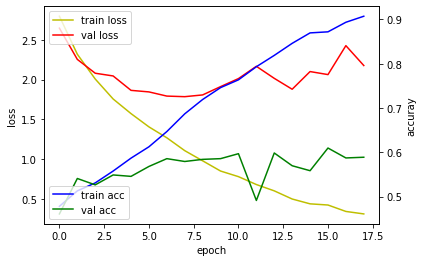

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Bidirectional
from keras import optimizers
from keras.callbacks import EarlyStopping

def bi_lstm_2():
    model = Sequential()
    model.add(Bidirectional(LSTM(32, return_sequences = True),  input_shape = (600,6)))
    model.add(Bidirectional(LSTM(64, return_sequences = True)))
    model.add(Bidirectional(LSTM(128, return_sequences = True)))
    model.add(Bidirectional(LSTM(256, return_sequences = False)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(61, activation='softmax'))
    
    #adam = optimizers.adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    return model

In [12]:
model = bi_lstm_2()
hist = model.fit(X,y, epochs=100, batch_size=32, verbose = 1,  validation_split=0.2, callbacks = [es])

Epoch 1/100
79/79 [==============================] - 2121s 27s/step - loss: 3.0602 - accuracy: 0.4479 - val_loss: 2.5313 - val_accuracy: 0.5152
Epoch 2/100
79/79 [==============================] - 2286s 29s/step - loss: 2.4338 - accuracy: 0.5100 - val_loss: 2.4142 - val_accuracy: 0.5168
Epoch 3/100
79/79 [==============================] - 1895s 24s/step - loss: 2.2291 - accuracy: 0.5252 - val_loss: 2.2711 - val_accuracy: 0.5232
Epoch 4/100
79/79 [==============================] - 1991s 25s/step - loss: 2.0157 - accuracy: 0.5285 - val_loss: 2.1795 - val_accuracy: 0.5456
Epoch 5/100
79/79 [==============================] - 2008s 25s/step - loss: 1.8123 - accuracy: 0.5534 - val_loss: 2.1675 - val_accuracy: 0.5248
Epoch 6/100
79/79 [==============================] - 2027s 26s/step - loss: 1.7346 - accuracy: 0.5531 - val_loss: 1.9703 - val_accuracy: 0.5552
Epoch 7/100
79/79 [==============================] - 2094s 27s/step - loss: 1.5608 - accuracy: 0.5975 - val_loss: 2.0733 - val_accuracy:

In [13]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/bi_LSTM_4_submission.csv', index=False)

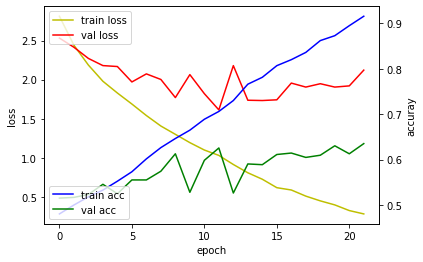

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()